# Chapter 1
After checking ROIs with "Suite2pROICheck", we have to extract F traces of only neurons.   
In this notebook, you can extract the traces and export as csv file.

In [ ]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tkinter.filedialog

In [ ]:
# load ROI check file
path_roicheck = tkinter.filedialog.askopenfilename(title='Select ROI check file', filetypes=[('MAT files', '*.mat')])
roicheck = loadmat(path_roicheck, simplify_cells=True)

# load Fall.mat
path_fall = roicheck["path_Fall"]
fall = loadmat(path_fall, simplify_cells=True)

f = fall["F"]

In [14]:
# choose the latest manualROIcheck
manual_roi_check = roicheck["manualROIcheck"]
manual_roi_check_latest = list(manual_roi_check.values())[-1]

In [ ]:
# In this example, we extract only "Neuron" ROIs, but change the column name depending on your setting.
idxs_neuron = manual_roi_check_latest["Neuron"]

f_neuron = f[idxs_neuron]

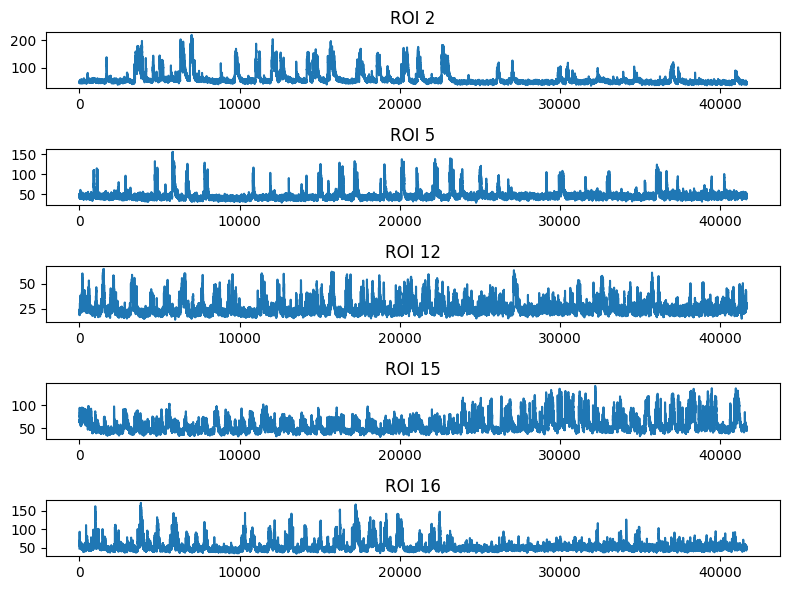

In [17]:
# trace example
fig, ax = plt.subplots(5, 1, figsize=(8, 6))

for i in range(5):
    ax[i].plot(f_neuron[i])
    ax[i].set_title(f"ROI {idxs_neuron[i]}")

plt.tight_layout()
plt.show()

In [ ]:
# convert trace array to DataFrame
# row : ROI, column : time(frame)
df_f_neuron = pd.DataFrame(f_neuron)
display(df_f_neuron)

,0,1,2,3,4,5,6,7,8,9,...,41649,41650,41651,41652,41653,41654,41655,41656,41657,41658
0,47.614483,46.643684,48.555984,46.864521,45.045952,47.130169,46.502769,45.102108,49.451275,50.146225,...,42.021175,47.818207,42.991341,41.069260,48.182556,46.397606,41.286854,43.258915,40.029774,44.483505
1,46.888538,45.466164,50.663689,47.072071,45.444511,50.225300,43.527458,45.732422,44.661644,48.530521,...,48.093967,47.319534,51.486015,53.093884,51.098602,51.522522,44.459740,43.471424,49.978481,42.222958
2,21.654104,20.997532,18.446861,21.920692,21.783257,21.046721,24.036062,21.326996,24.228004,22.693689,...,27.015305,27.228172,27.414536,29.639008,26.244972,27.547728,28.853533,27.338779,26.589485,25.110754
3,67.745026,63.293270,62.068989,64.895874,64.193962,65.097992,68.466629,63.719410,63.030975,64.746033,...,48.046089,50.319298,50.696880,48.074085,50.625114,45.214546,43.357910,49.493679,45.442463,44.886711
4,48.413464,54.419811,50.456543,51.354031,51.598122,51.404972,51.896622,50.649364,55.595821,63.103455,...,51.869804,52.374046,54.533684,51.625980,46.516197,48.354176,51.708118,49.360626,47.699638,51.561031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,33.341537,38.423672,33.222412,35.316040,36.329514,39.175575,36.454548,33.979622,38.825024,40.698753,...,35.990555,43.570271,41.520603,38.773647,40.222591,38.398430,38.323387,41.998665,36.026428,33.653637
72,31.159586,31.372904,36.431698,30.922583,30.499630,29.668415,29.612038,28.344496,29.301146,28.214113,...,31.133108,33.662540,36.179398,33.312790,35.269623,32.931255,29.319313,28.805071,32.884293,31.301317
73,36.300159,36.111118,38.565128,42.974819,39.012001,42.018326,40.258827,35.927967,38.673313,51.757191,...,32.206329,34.797951,33.954796,35.041996,35.096176,35.265907,34.313622,35.137554,39.187893,33.097343
74,32.145329,40.046261,39.178303,32.809013,42.137547,40.039001,42.948063,38.421303,37.604549,44.174809,...,39.030151,43.490147,40.781704,38.066662,41.411053,38.635380,41.381371,36.276108,41.746357,40.894482


In [23]:
# save as CSV
path_dst = tkinter.filedialog.asksaveasfilename(title='Save as', filetypes=[('CSV files', '*.csv')], initialfile=path_roicheck.replace(".mat", ".csv"))
df_f_neuron.to_csv(path_dst, index=False, header=False)